## Observations and Insights 

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview

combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [53]:
# Checking the number of mice.

len(combined_df['Mouse ID'].value_counts())


249

In [54]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

                                

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [55]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_df.loc[combined_df["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [56]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.loc[combined_df["Mouse ID"] != "g989"]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [57]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].value_counts())


248

## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_mean = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
summary_median = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
summary_var = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
summary_std = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
summary_sem = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


series_1 = pd.merge(summary_mean, summary_median, how='outer', on='Drug Regimen', suffixes=('_mean', '_median'))

series_2 = pd.merge(series_1, summary_var, how='outer', on='Drug Regimen')
series_2_renamed = series_2.rename(columns={"Tumor Volume (mm3)": "Tumor Volume (mm3)_var"})

series_3 = pd.merge(series_2_renamed, summary_std, how='outer', on='Drug Regimen')
series_3_renamed = series_3.rename(columns={"Tumor Volume (mm3)": "Tumor Volume (mm3)_std"})

series_4 = pd.merge(series_3_renamed, summary_sem, how='outer', on='Drug Regimen')
series_4_renamed = series_4.rename(columns={"Tumor Volume (mm3)": "Tumor Volume (mm3)_std"})


series_4_renamed


,Tumor Volume (mm3)_mean,Tumor Volume (mm3)_median,Tumor Volume (mm3)_var,Tumor Volume (mm3)_std,Tumor Volume (mm3)_std
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_df = cleaned_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var', 'std', 'sem'])


# Styling the Table
th_props = [
  ('text-align', 'center'),
    ('border', '1px solid black')
  ]

td_props = [
  ('text-align', 'center'),
    ('border', '1px solid black')
  ]

styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]


final_summary_df = summary_df.style.set_table_styles(styles)

final_summary_df

## Bar and Pie Charts

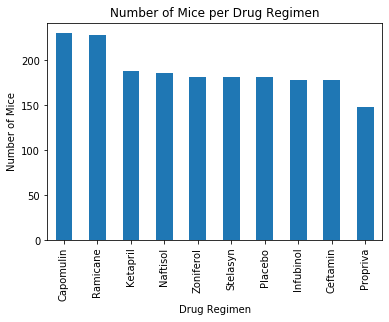

In [60]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mouse_cleaned_df = cleaned_df.groupby(["Drug Regimen"])["Mouse ID"].count()

mouse_cleaned_df = mouse_cleaned_df.sort_values(ascending=False)

mouse_cleaned_df.plot(kind="bar")

plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()


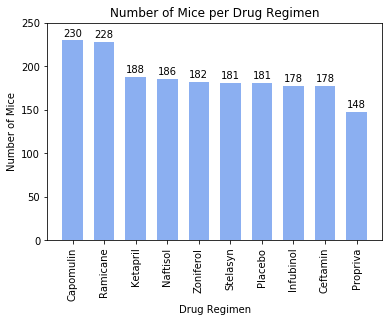

In [61]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

fig, ax = plt.subplots()

drugs = mouse_cleaned_df.keys()
unique_values = cleaned_df["Drug Regimen"].unique()

x_axis = np.arange(len(unique_values))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation=90)

y_axis = mouse_cleaned_df.values


rects1 = ax.bar(x_axis, y_axis, color="cornflowerblue", alpha=0.75, align="center",  width=0.65)

ax.set_ylabel('Number of Mice')
ax.set_title('Number of Mice per Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylim(0,mouse_cleaned_df.values.max()+20)


def autolabel(rects):
    # Attach a text label above each bar in *rects*, displaying its height.
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

plt.show()



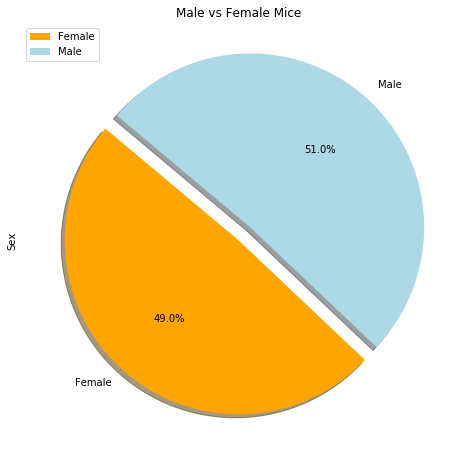

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count = cleaned_df.groupby(["Sex"])["Sex"].count()

colors = ["orange","lightblue"]

explode = (0,0.1)

gender_count.plot(kind="pie", title="Male vs Female Mice", figsize=(10,8), startangle=140, legend=True,
                  autopct='%1.1f%%', colors=colors, explode = explode, shadow=True,)


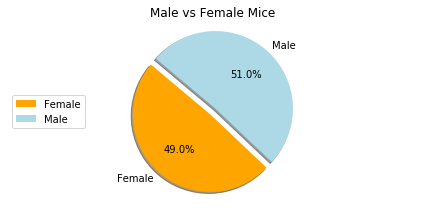

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

gender = gender_count.keys()
length = cleaned_df["Sex"].unique()

x_axis = np.arange(len(length))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, gender, rotation=90)

y_axis = gender_count.values

explode = (0,0.1)
colors = ["orange","lightblue"]

ax.pie(y_axis, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

ax.set_title("Male vs Female Mice")
ax.legend(loc="center left")

plt.axis("equal")

fig.tight_layout()
plt.show()



## Quartiles, Outliers and Boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Sorting by timepoint
timepoint_sorted = cleaned_df.sort_values(by="Timepoint", ascending=False)

# Leaving only greatest timepoints by removing duplicates mouse ids
timepoint_per_mouse = timepoint_sorted.drop_duplicates(subset="Mouse ID")


In [65]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# The instructor shared this code to help the class.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = timepoint_per_mouse.loc[timepoint_per_mouse["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers are: {outliers.values}")
    


Capomulin's potential outliers are: []
Ramicane's potential outliers are: []
Infubinol's potential outliers are: [36.3213458]
Ceftamin's potential outliers are: []


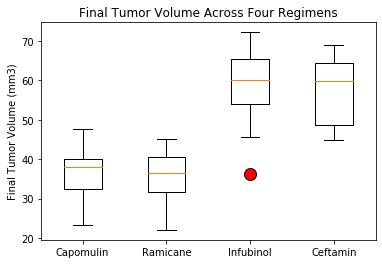

In [66]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data = tumor_vol_list

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                   markeredgecolor='black')
plt.boxplot(data, flierprops=flierprops)

plt.title('Final Tumor Volume Across Four Regimens')
plt.ylabel('Final Tumor Volume (mm3)')
tick_locations = np.arange(1,5,1)
plt.xticks(tick_locations, treatment_list)
plt.show()



## Line and Scatter Plots

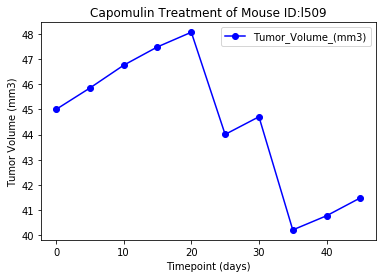

In [67]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
import random as rn

list_capomulin = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]

dropped_list_capomulin = list_capomulin.drop_duplicates(subset="Mouse ID")
  
chosen_mouse_df = dropped_list_capomulin.iloc[[21]]

chosen_mouse_id = chosen_mouse_df.iloc[0, 0]

chosen_mouse_id_df = cleaned_df.loc[(cleaned_df["Mouse ID"] == chosen_mouse_id) & (cleaned_df["Drug Regimen"] == "Capomulin")]

timepoint_values = chosen_mouse_id_df["Timepoint"].values

tumor_volume = chosen_mouse_id_df["Tumor Volume (mm3)"].values


timepoint, = plt.plot(timepoint_values, tumor_volume, color="blue",marker="o", label="Tumor_Volume_(mm3)")

plt.title(f"Capomulin Treatment of Mouse ID:{chosen_mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.legend(handles=[timepoint], loc="best")



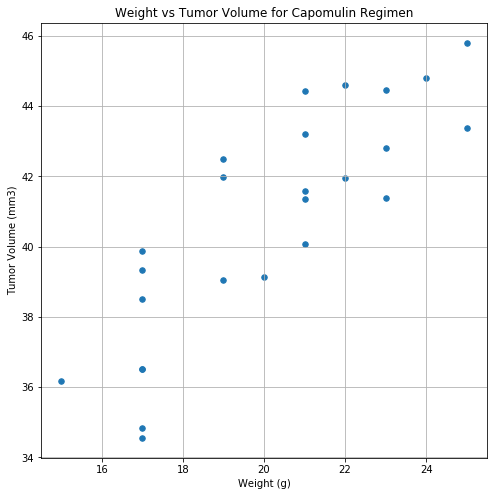

In [68]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cleaned_by_capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]

grouped_by_capomulin_mouse_id_df = cleaned_by_capomulin_df.groupby(["Mouse ID", "Drug Regimen"]).mean()

grouped_by_capomulin_mouse_id_df

grouped_by_capomulin_mouse_id_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8), 
                                      marker = "o", s = 30, title="Weight vs Tumor Volume for Capomulin Regimen")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


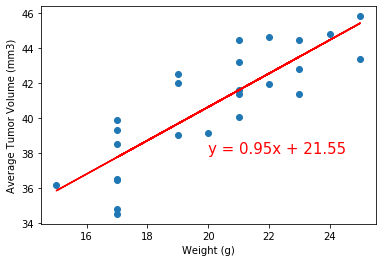

In [69]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

mouse_weight_mean = grouped_by_capomulin_mouse_id_df["Weight (g)"]
mouse_id_tumor_mean = grouped_by_capomulin_mouse_id_df["Tumor Volume (mm3)"]


x_values = mouse_weight_mean
y_values = mouse_id_tumor_mean
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

correlation = st.pearsonr(mouse_weight_mean,mouse_id_tumor_mean)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()
